<a href="https://colab.research.google.com/github/olujerry/olujerry/blob/main/Sentiment_Analyis_In_Comet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 446 kB 4.2 MB/s 
     |████████████████████████████████| 139 kB 40.4 MB/s 
     |████████████████████████████████| 502 kB 34.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 174 kB 46.7 MB/s 
     |████████████████████████████████| 140 kB 44.2 MB/s 
     |████████████████████████████████| 127 kB 42.1 MB/s 
     |████████████████████████████████| 173 kB 52.3 MB/s 
     |████████████████████████████████| 168 kB 51.1 MB/s 
     |████████████████████████████████| 168 kB 59.1 MB/s 
     |████████████████████████████████| 166 kB 38.2 MB/s 
     |████████████████████████████████| 166 kB 68.1 MB/s 
     |████████████████████████████████| 162 kB 60.3 MB/s 
     |████████████████████████████████| 162 kB 47.0 MB/s 
     |██████████████████████████████

In [2]:
from comet_ml import Experiment

In [22]:
comet_string = """[comet] 
api_key=K1fGCe5YL4XrwI01qoCSNvY3R
project_name=Sentiment Analyis 
workspace=olujerry
"""
with open('.comet.config', 'w') as f:
    f.write(comet_string)
Experiment.log_figure(figure_name="Sentiment Analysis", figure=fig1)
Experiment.log_figure(figure_name= "Disneyland Reviews Sentiment", figure=fig2)
Experiment.log_figure(figure_name= "Disneyland Reiews Sentiment Distribution", figure=fig3)

{'web': 'https://www.comet.com/api/image/download?imageId=c9c1c590f75d4d3da15ec63b9f63cc62&experimentKey=8b2d4d234aa349028ec474ae445bc58f',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=c9c1c590f75d4d3da15ec63b9f63cc62&experimentKey=8b2d4d234aa349028ec474ae445bc58f',
 'imageId': 'c9c1c590f75d4d3da15ec63b9f63cc62'}

In [4]:
exp = Experiment()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/olujerry/sentiment-analyis/662e409556fb4a529f52d9135192de0d



In [6]:
# import comet_ml at the top of your file
import comet_ml

# Create an experiment
Experiment = comet_ml.Experiment(
    project_name="Sentiment Analysis",
    workspace="<olujerry>",
    auto_metric_logging=True,
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/olujerry/sentiment-analyis/662e409556fb4a529f52d9135192de0d
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for

In [9]:
pip install plotly==5.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 4.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [11]:
Disney_reviews = pd.read_csv('/content/DisneylandReviews.csv',encoding='latin-1')

In [12]:
Disney_reviews.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']
Disney_reviews['compound'] = Disney_reviews['Review_Text'].apply(function)
Disney_reviews.head(5)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.7069
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.9901
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.9920
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.8489
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.2846


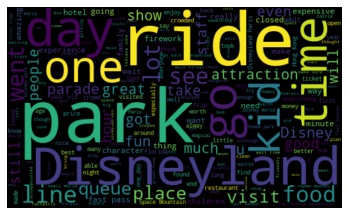

In [14]:
# Word cloud visualization.
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in Disney_reviews['Review_Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
def getAnalysis(Rating):
 if Rating < 0:
    return 'Negative'
 elif Rating == 0:
    return 'Neutral'
 else:
    return 'Positive'

Disney_reviews['sentiment'] = Disney_reviews['compound'].apply(getAnalysis)

Disney_reviews.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound,sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.7069,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.9901,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.9920,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.8489,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.2846,Positive


In [16]:
Disney_reviews.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound,sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.7069,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.9901,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.9920,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.8489,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.2846,Positive


In [17]:
positive = Disney_reviews[Disney_reviews['sentiment'] == 1]
negative = Disney_reviews[Disney_reviews['sentiment'] == -1]

In [18]:
Disney_reviews['sentiment'].value_counts()

Positive    37799
Negative     4389
Neutral       468
Name: sentiment, dtype: int64

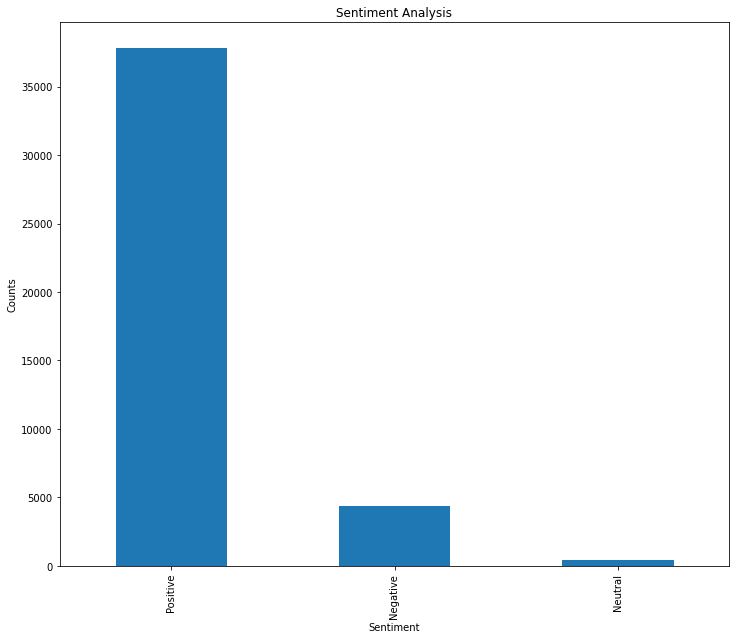

In [19]:
fig1 = plt.figure(figsize=(12, 10))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
Disney_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Disneyland Reviews Sentiment')

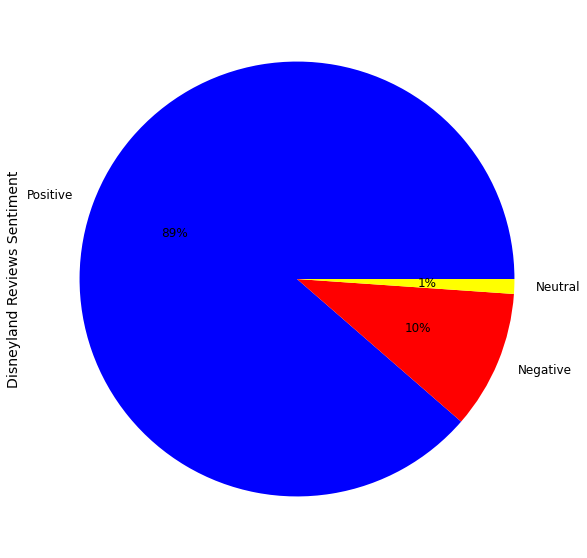

In [20]:
fig2 = plt.figure(figsize=(12, 10))
Disney_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, colors=["blue", "red", "yellow"])
plt.ylabel("Disneyland Reviews Sentiment", size=14)

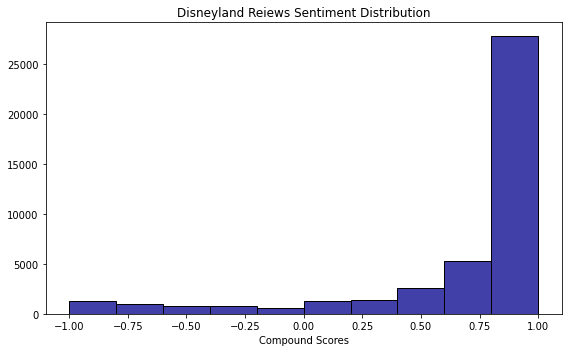

In [21]:
fig3 = plt.figure(figsize=(8, 5))
sns.histplot(Disney_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Disneyland Reiews Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

In [23]:
Experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/olujerry/sentiment-analysis/8b2d4d234aa349028ec474ae445bc58f
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 3
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Uploading 16 metrics, params and output messages
